In [1]:
%matplotlib inline



grandient_step :  1000
loss :            0.8205007



<Figure size 432x288 with 0 Axes>

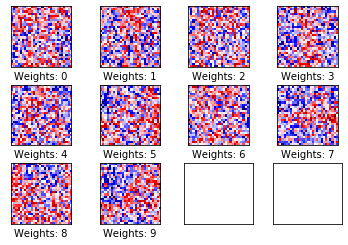

grandient_step :  2000
loss :            0.65816176



<Figure size 432x288 with 0 Axes>

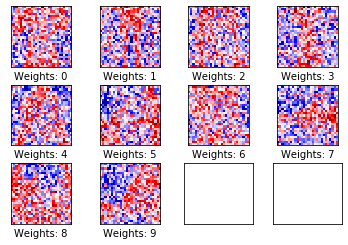

grandient_step :  3000
loss :            0.58616436



<Figure size 432x288 with 0 Axes>

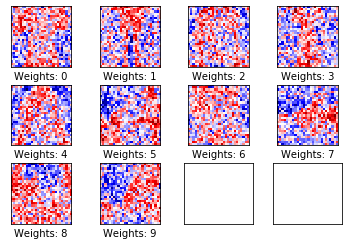

grandient_step :  4000
loss :            0.4876097



<Figure size 432x288 with 0 Axes>

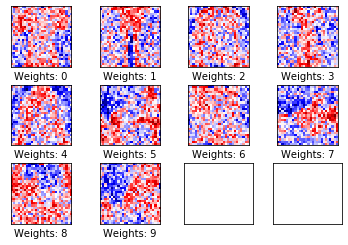

grandient_step :  5000
loss :            0.5058359



<Figure size 432x288 with 0 Axes>

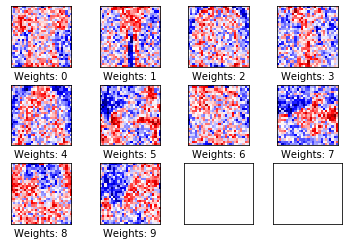

grandient_step :  6000
loss :            0.5374957



<Figure size 432x288 with 0 Axes>

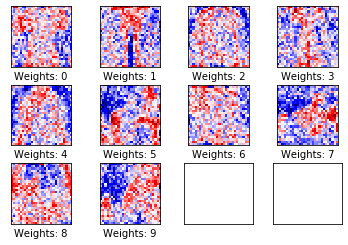

grandient_step :  7000
loss :            0.47355074



<Figure size 432x288 with 0 Axes>

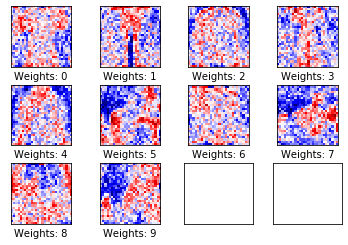

grandient_step :  8000
loss :            0.47684813



<Figure size 432x288 with 0 Axes>

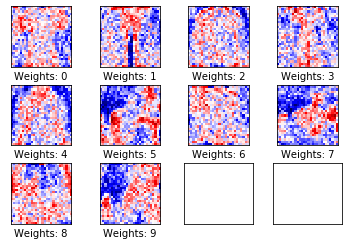

grandient_step :  9000
loss :            0.47073433



<Figure size 432x288 with 0 Axes>

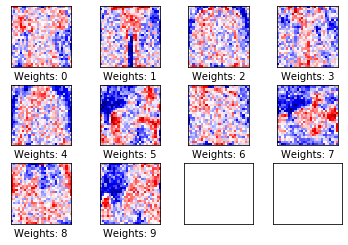

grandient_step :  10000
loss :            0.47045523



<Figure size 432x288 with 0 Axes>

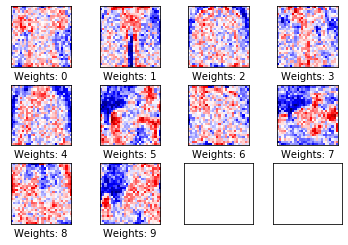

grandient_step :  11000
loss :            0.4122877



<Figure size 432x288 with 0 Axes>

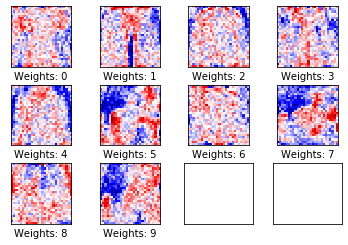

grandient_step :  12000
loss :            0.469341



<Figure size 432x288 with 0 Axes>

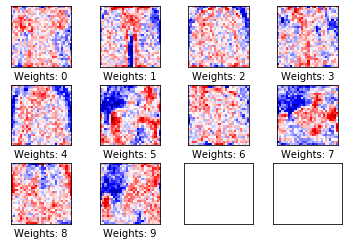

grandient_step :  13000
loss :            0.48421127



<Figure size 432x288 with 0 Axes>

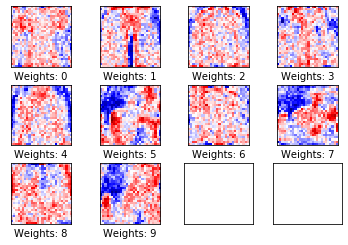

grandient_step :  14000
loss :            0.44832218



<Figure size 432x288 with 0 Axes>

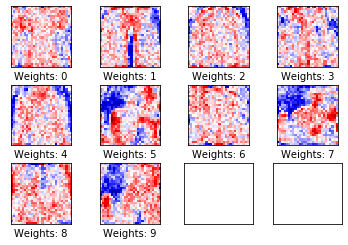

grandient_step :  15000
loss :            0.3616553



<Figure size 432x288 with 0 Axes>

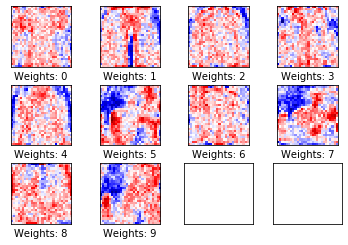

grandient_step :  16000
loss :            0.39599603



<Figure size 432x288 with 0 Axes>

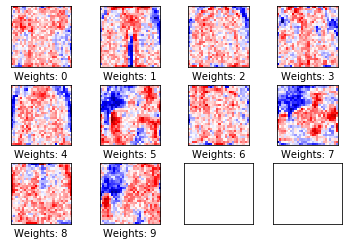

grandient_step :  17000
loss :            0.3663308



<Figure size 432x288 with 0 Axes>

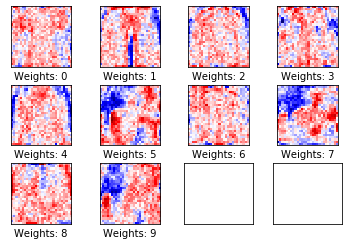

grandient_step :  18000
loss :            0.4099744



<Figure size 432x288 with 0 Axes>

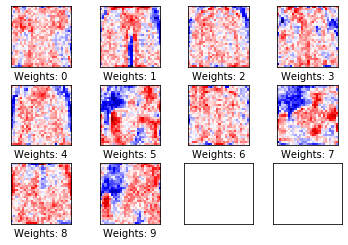

grandient_step :  19000
loss :            0.37063742



<Figure size 432x288 with 0 Axes>

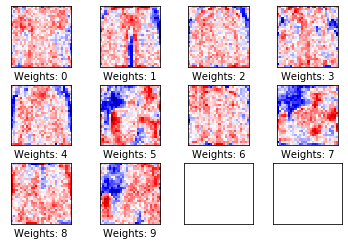

grandient_step :  20000
loss :            0.338761



<Figure size 432x288 with 0 Axes>

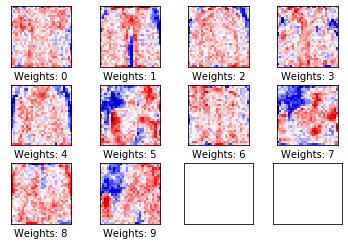

grandient_step :  21000
loss :            0.39636484



<Figure size 432x288 with 0 Axes>

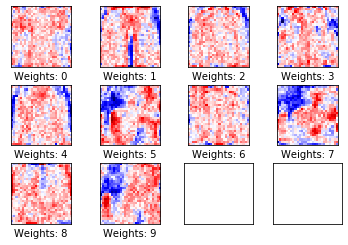

grandient_step :  22000
loss :            0.40461147



<Figure size 432x288 with 0 Axes>

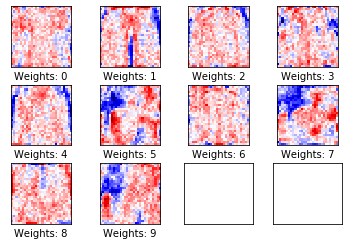

grandient_step :  23000
loss :            0.4356163



<Figure size 432x288 with 0 Axes>

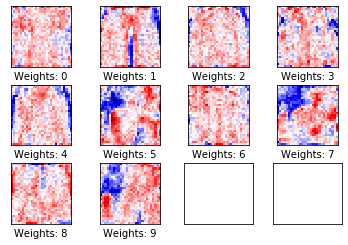

train accuracy :  0.8622333333333333
test accuracy :  0.8439
INFO:tensorflow:Restoring parameters from result/model/model_1
train accuracy :  0.8622333333333333
test accuracy :  0.8439
[[836   3  14  44   7   0  83   0  13   0]
 [  4 956   3  27   5   0   3   0   2   0]
 [ 22   5 725   9 154   1  78   0   6   0]
 [ 32  12  13 867  32   0  39   0   5   0]
 [  0   0 107  35 776   0  74   0   8   0]
 [  0   0   0   1   0 906   0  55   5  33]
 [161   2 127  35 112   0 537   0  26   0]
 [  0   0   0   0   0  30   0 938   0  32]
 [  3   1   6  10   3   5  20   5 947   0]
 [  0   0   0   0   0   9   0  39   1 951]]


<Figure size 432x288 with 0 Axes>

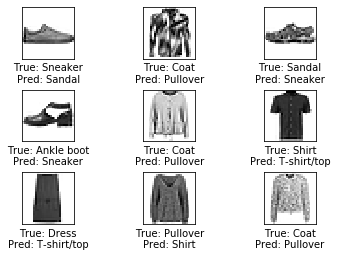

In [7]:
import numpy as np
import tensorflow as tf
from model.softmax_regression import SoftmaxRegression
from data_loading import fashion_mnist_flat_loader as mnist_flat
import matplotlib.pyplot as plt
    
x_train, y_train, y_train_cls, x_test, y_test, y_test_cls, cls_names = mnist_flat.data_loading()
    
with tf.Session() as sess:
    a = SoftmaxRegression(x_train, y_train, y_train_cls, cls_names, sess,
                 lr=1e-4, epoch=100, batch_size=256, report_period=1000, np_seed=1, tf_seed=1,
                 initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"),
                 save_path='result/model/model_1',
                 figure_save_dir='result/img')
    a.train()
        
    print('train accuracy : ', a.compute_accuracy(x_train, y_train, y_train_cls))
    print('test accuracy : ', a.compute_accuracy(x_test, y_test, y_test_cls))
    
with tf.Session() as sess:
    a = SoftmaxRegression(x_train, y_train, y_train_cls, cls_names, sess,
                 lr=1e-4, epoch=100, batch_size=256, report_period=1000, np_seed=1, tf_seed=1,
                 initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"),
                 save_path='result/model/model_1',
                 figure_save_dir='result/img')
    a.restore()
        
    print('train accuracy : ', a.compute_accuracy(x_train, y_train, y_train_cls))
    print('test accuracy : ', a.compute_accuracy(x_test, y_test, y_test_cls))
    
    a.compute_confusion_matrix(x_test, y_test, y_test_cls)
    a.plot_9_images_with_false_prediction(x_test, y_test, y_test_cls)